In [1]:
pd.options.mode.chained_assignment = None
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import os
import math
from adjustText import adjust_text

sns.set(rc={'figure.figsize':(20, 30)})

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
%matplotlib inline
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
#import pyperclip as pc

# Load files 

In [2]:
eae_genes = pd.read_csv('data\EAE_gene_list.csv')
ms_genes = pd.read_csv('data\MS_related_genes.csv')
df=pd.read_excel('data\\Unstim_vs_IgE_Differential_Expression.xlsx')

# Preprocess and log transform

In [3]:
def preprocess(df):
    df = df[['Gene Symbol', 'Entrez ID', 'F_unstim_S4', 'M_unstim_S2', 'F_IgE_S3', 'M_IgE_S1']]
    df = df.dropna()
    df = df.replace(0, np.nan)
    df = df.dropna(axis=0, thresh = 4).fillna(0)
    return df
def logs(i):
    i["log_Mi"] = np.log2(i['M_IgE_S1']+1)
    i["log_Fi"] = np.log2(i['F_IgE_S3']+1)
    i["log_Mu"] = np.log2(i['M_unstim_S2']+1)
    i["log_Fu"] = np.log2(i['F_unstim_S4']+1)
    i["unstim_XD"] = i["log_Mu"] - i["log_Fu"]
    i["IgE_XD"] = i["log_Mi"] - i["log_Fi"]
    return i

In [4]:
df = preprocess(df)
df = logs(df)

In [5]:
df.head()
df.shape

,Gene Symbol,Entrez ID,F_unstim_S4,M_unstim_S2,F_IgE_S3,M_IgE_S1,log_Mi,log_Fi,log_Mu,log_Fu,unstim_XD,IgE_XD
0,Ccl1,20290,4.829065,4.680695,23959.367737,43864.638069,15.420804,14.548362,2.506067,2.543265,-0.037197,0.872441
1,Serpinb9b,20706,0.804844,2.340347,12956.022455,9704.409675,13.244573,13.661447,1.739998,0.851874,0.888124,-0.416873
2,Gstt1,14871,17.706573,7.021042,2446.966235,3081.395634,11.589836,11.257368,3.003790,4.225473,-1.221684,0.332468
3,Il9,16198,0.000000,0.000000,3954.312500,3016.280182,11.559033,11.949576,0.000000,0.000000,0.000000,-0.390543
4,Slco5a1,240726,15.292041,15.212258,1585.491012,1378.461013,10.429889,10.631624,4.019013,4.026095,-0.007082,-0.201735


(14445, 12)

In [6]:
def sexdominant(df):
    if (df['IgE_XD'] > 0):
        return "M"
    if (df['IgE_XD'] < 0):
        return "F"

def heatmapper(df):
    df['IgE dominance'] = df.apply(sexdominant, axis=1)
    df = df[['Gene Symbol', 'log_Fu', 'log_Mu', 'log_Fi', 'log_Mi', 'IgE dominance']].set_index('Gene Symbol')
    lut = {"M":"blue", "F":"red"}
    row_colors =df['IgE dominance'].map(lut)
    
    fig = sns.clustermap(data=df[['log_Fu', 'log_Mu', 'log_Fi', 'log_Mi']], 
               z_score=0,
               metric = 'correlation',
               row_cluster=True, 
               col_cluster=False, 
               cmap='coolwarm',
               figsize=(10, 15),
               cbar_pos=(.1, .81, .05, .1),
               row_colors=row_colors)
    return fig

In [10]:
df1 = df[['Gene Symbol', 'IgE_XD']]

In [17]:
df.columns

Index(['Gene Symbol', 'Entrez ID', 'F_unstim_S4', 'M_unstim_S2', 'F_IgE_S3',
       'M_IgE_S1', 'log_Mi', 'log_Fi', 'log_Mu', 'log_Fu', 'unstim_XD',
       'IgE_XD'],
      dtype='object')

In [34]:
df1['mean'] = (df['log_Mi'] + df['log_Fi'] + df['log_Mu'] + df['log_Fu']) /4

<AxesSubplot:xlabel='mean', ylabel='IgE_XD'>

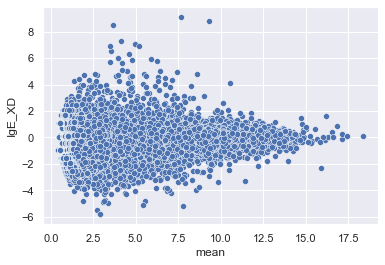

In [35]:
sns.scatterplot(data = df1, x='mean', y='IgE_XD')

In [36]:
df1

,Gene Symbol,IgE_XD,mean
0,Ccl1,0.872441,8.754625
1,Serpinb9b,-0.416873,7.374473
2,Gstt1,0.332468,7.519117
3,Il9,-0.390543,5.877152
4,Slco5a1,-0.201735,7.276655
...,...,...,...
15781,Gm6578,-0.253914,1.793452
15782,Abhd1,-0.656031,2.769772
15783,Kcnj10,-0.831502,2.010473
15784,Jam3,-1.851303,2.002492
